In [ ]:
pip install lightgbm xgboost



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\91822\Downloads\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

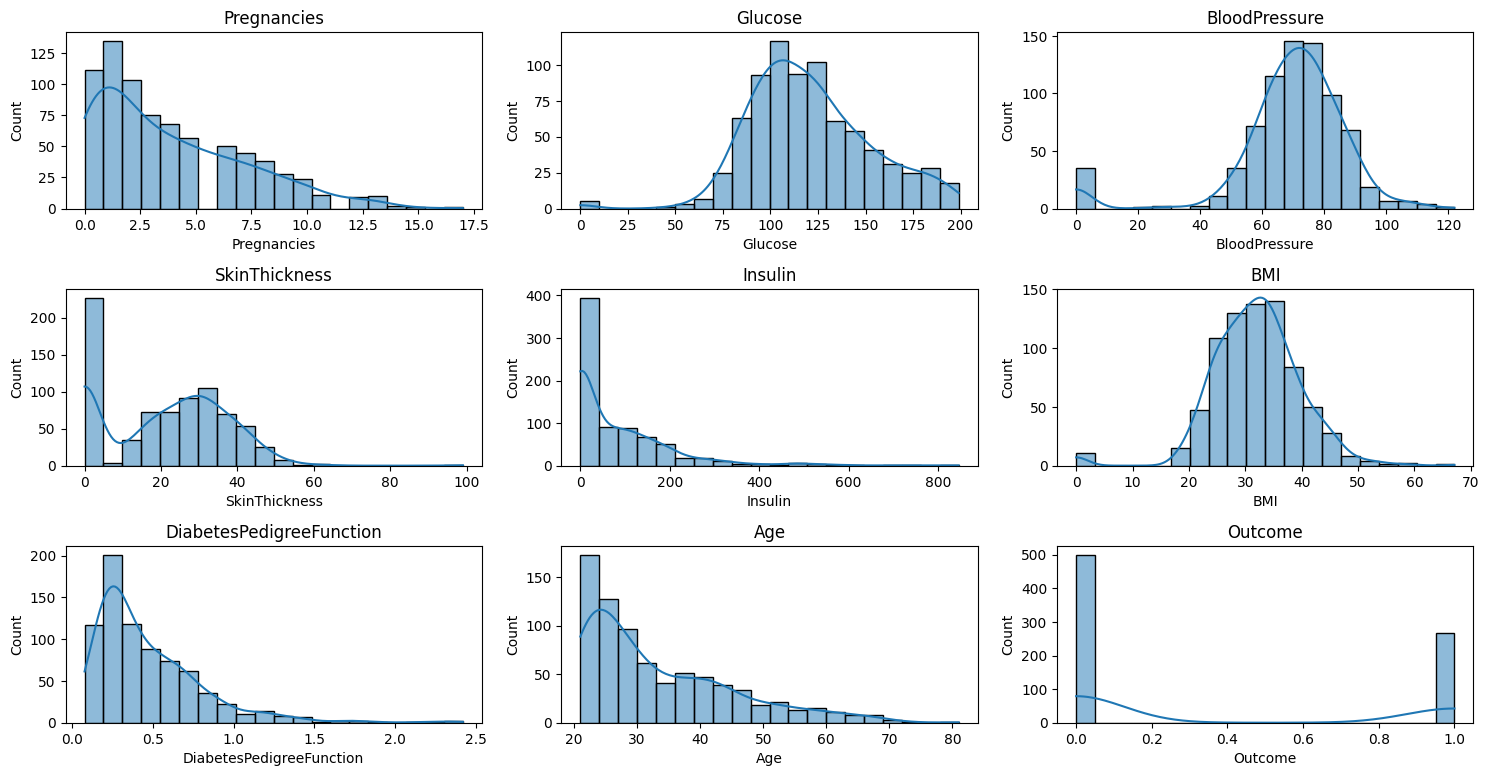

In [8]:
#Plotting Histogram of all numeric value in Hear Disease in the data set
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # 3 per row
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

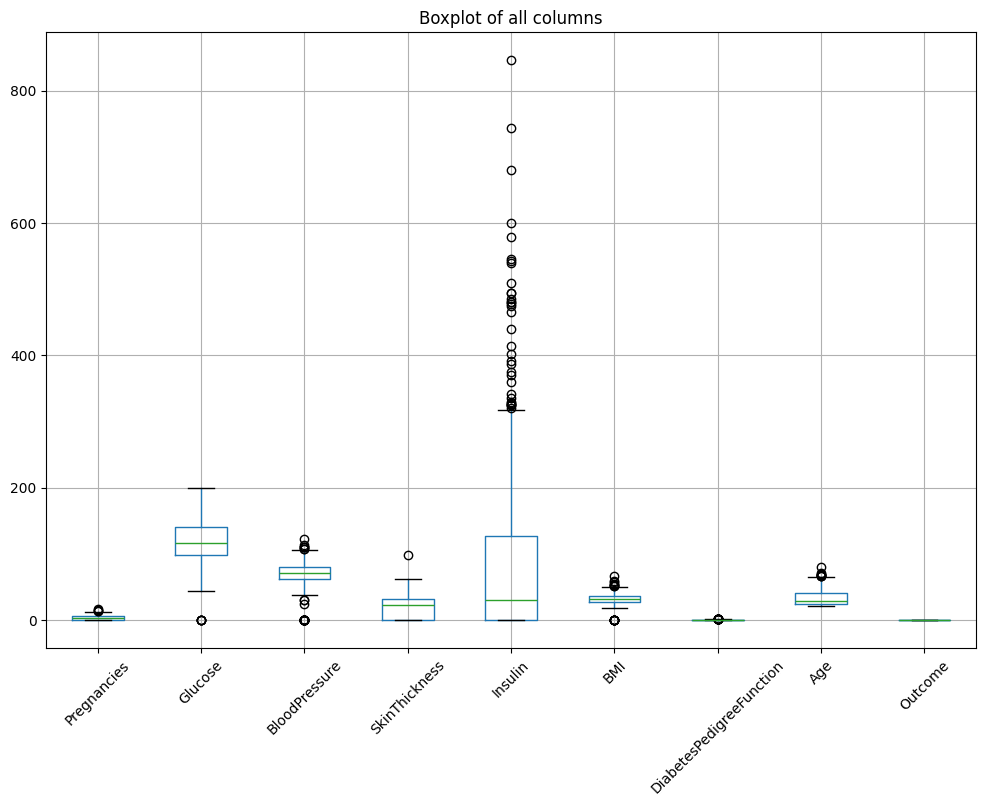

In [16]:
#Boxplot 

df.boxplot(figsize=(12,8))
plt.title("Boxplot of all columns")
plt.xticks(rotation=45)
plt.show()           

In [9]:
#Capping of the outliers

def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(
        lambda x: lower_limit if x < lower_limit 
        else upper_limit if x > upper_limit 
        else x
    )

# Apply outlier capping to all numeric columns
for column in df.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(df, column)

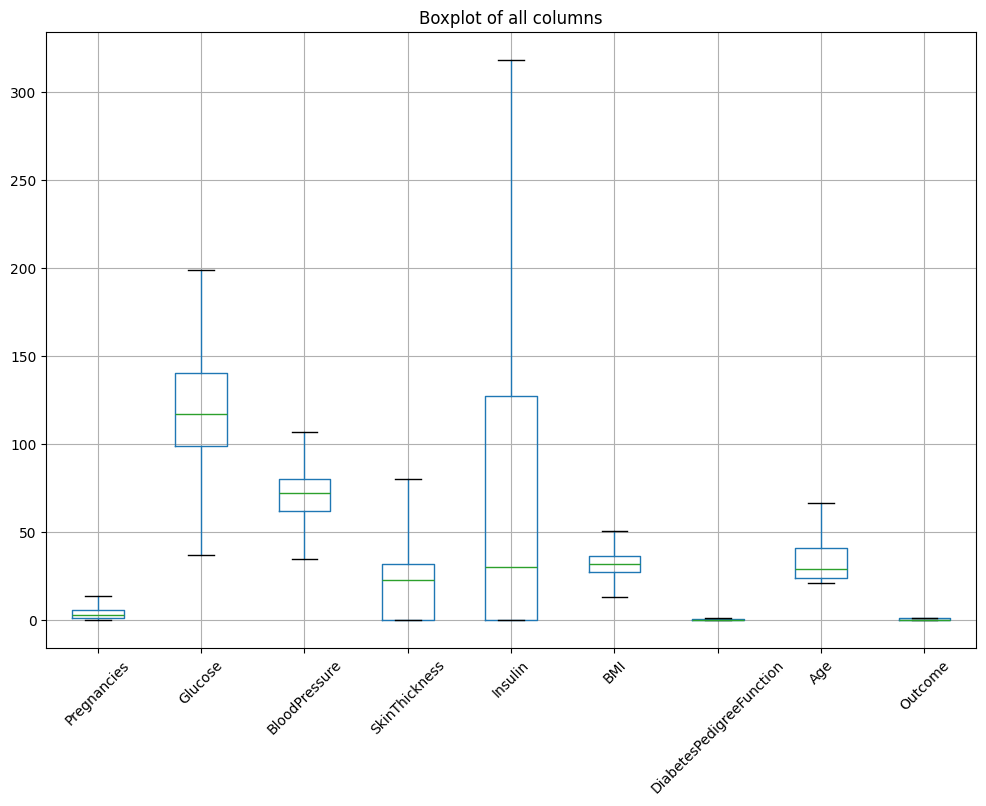

In [10]:
df.boxplot(figsize=(12,8))
plt.title("Boxplot of all columns")
plt.xticks(rotation=45)
plt.show() 

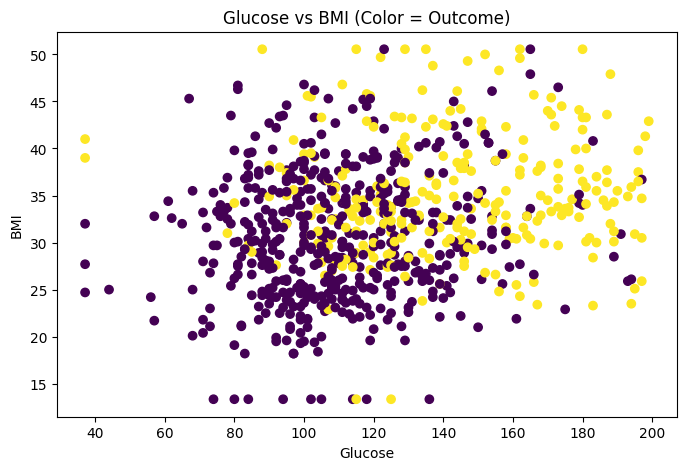

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI (Color = Outcome)')
plt.show()



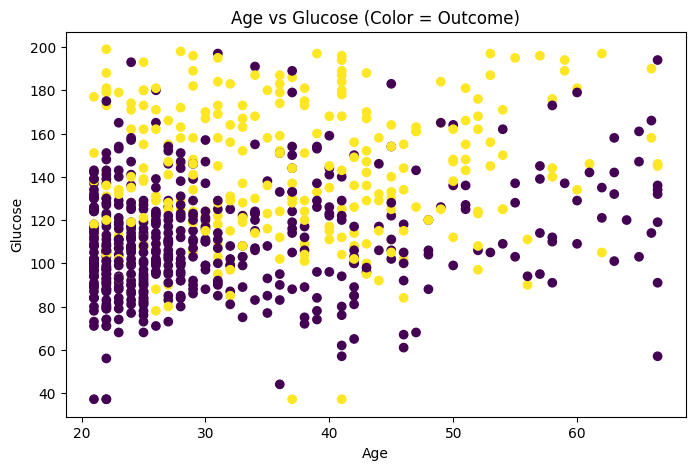

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Glucose'], c=df['Outcome'])
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose (Color = Outcome)')
plt.show()


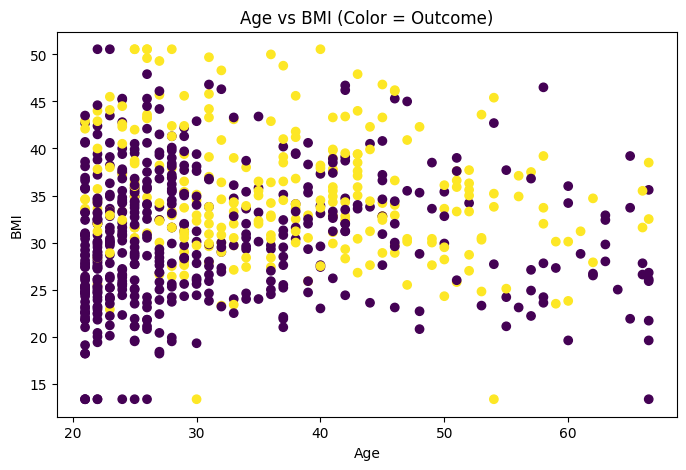

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['BMI'], c=df['Outcome'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI (Color = Outcome)')
plt.show()


In [20]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 50,67.5,88,103],
                            labels=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction',
                                    'Age'])


C:\Users\91822\AppData\Local\Temp\ipykernel_22368\2576188078.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('BMI_Category')['Outcome'].mean().plot(kind='bar')


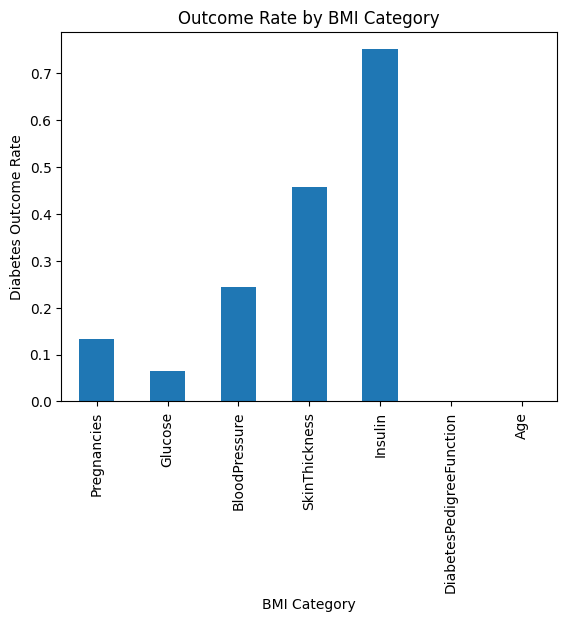

In [21]:
df.groupby('BMI_Category')['Outcome'].mean().plot(kind='bar')
plt.title("Outcome Rate by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Diabetes Outcome Rate")
plt.show()


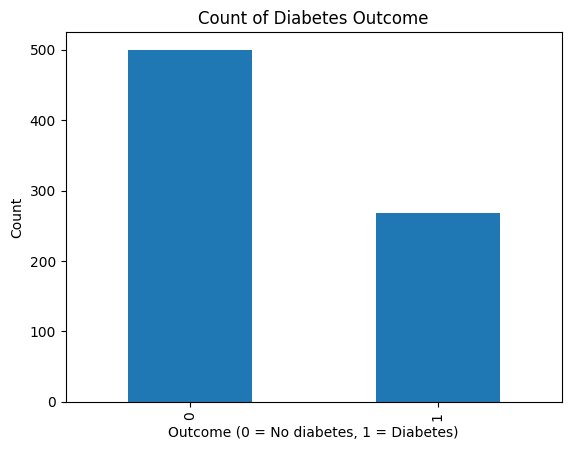

In [29]:
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Count of Diabetes Outcome")
plt.xlabel("Outcome (0 = No diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()


In [ ]:
'''1.Split the preprocessed dataset into training and testing sets.
2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.Build predictive models using LightGBM and XGBoost algorithms.
4.Train the models on the training set and evaluate their performance on the testing set.
5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [24]:
X = df.drop('Outcome' , axis=1)

In [30]:
y = df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [37]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

In [39]:
xgb = XGBClassifier(
    enable_categorical=True,
    tree_method="hist"    # required for categorical
)


In [40]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train, categorical_feature=['BMI_Category'])


[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 661
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [42]:
xgb.fit(X_train, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,True
,eval_metric,None


In [43]:
xgb_pred = xgb.predict(X_test)
xgb_proba = xgb.predict_proba(X_test)[:, 1] if hasattr(xgb, "predict_proba") else None

lgbm_pred = lgbm.predict(X_test)
lgbm_proba = lgbm.predict_proba(X_test)[:, 1] if hasattr(lgbm, "predict_proba") else None


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

def evaluate(name, y_true, y_pred, y_proba=None):
    print(f"\n=== {name} ===")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    if y_proba is not None:
        try:
            print("ROC AUC:", round(roc_auc_score(y_true, y_proba), 4))
        except Exception:
            pass

evaluate("XGBoost", y_test, xgb_pred, xgb_proba)
evaluate("LightGBM", y_test, lgbm_pred, lgbm_proba)



=== XGBoost ===
Accuracy: 0.7208
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.60      0.59      0.60        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
 [[79 21]
 [22 32]]
ROC AUC: 0.7926

=== LightGBM ===
Accuracy: 0.7273
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[81 19]
 [23 31]]
ROC AUC: 0.8204


In [ ]:
#Hyperparameter and tunning of the model 

In [48]:
from scipy.stats import randint, uniform
xgb_param_dist = {
    "n_estimators": randint(50, 400),
    "learning_rate": uniform(0.01, 0.3),
    "max_depth": randint(3, 10),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.5, 0.5),
    "reg_alpha": uniform(0.0, 1.0),
    "reg_lambda": uniform(0.0, 1.0)
}

In [51]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=50,                 # raise this for more thorough search
    scoring="roc_auc",
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    refit=True
)


In [ ]:
print("Starting XGBoost RandomizedSearchCV...")
search.fit(X_train, y_train)

In [63]:
print("Best XGBoost params:", search.best_params_)
print("Best CV ROC-AUC:", search.best_score_)


Best XGBoost params: {'bagging_fraction': np.float64(0.628376366799971), 'feature_fraction': np.float64(0.6983919136069442), 'learning_rate': np.float64(0.02523055931181908), 'max_depth': 5, 'min_data_in_leaf': 96, 'n_estimators': 192, 'num_leaves': 111}
Best CV ROC-AUC: 0.8285188261351053


In [64]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

best_xgb = search.best_estimator_

y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fraction is set=0.6983919136069442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983919136069442
[LightGBM] [Warning] bagging_fraction is set=0.628376366799971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628376366799971
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fraction is set=0.6983919136069442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983919136069442
[LightGBM] [Warning] bagging_fraction is set=0.628376366799971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628376366799971
Test Accuracy: 0.7597402597402597
Test ROC-AUC: 0.8257407407407408
Classification Report:
               precision    recall  f1-score   support

           0

In [ ]:
# lgbm_hyperparam_tune.py
# Requirements: pip install lightgbm scikit-learn joblib scipy pandas

import pandas as pd
import joblib
from scipy.stats import randint, uniform
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier


# Convert object/category columns to numeric codes (LightGBM can accept category dtype, but codes are fine)
for c in X.select_dtypes(include=["object", "category"]).columns:
    X[c] = X[c].astype("category").cat.codes

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# 3. CV strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Parameter distributions
lgbm_param_dist = {
    "n_estimators": randint(50, 400),
    "learning_rate": uniform(0.01, 0.3),
    "num_leaves": randint(20, 200),
    "max_depth": randint(3, 15),
    "feature_fraction": uniform(0.5, 0.5),
    "bagging_fraction": uniform(0.6, 0.4),
    "min_data_in_leaf": randint(10, 100)
}

# 5. Model and RandomizedSearchCV
lgbm = LGBMClassifier(random_state=42)
search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_param_dist,
    n_iter=50,                 # raise this for more thorough search
    scoring="roc_auc",
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    refit=True
)

# 6. Run search
print("Starting LightGBM RandomizedSearchCV...")
search.fit(X_train, y_train)

# 7. Results
print("Best LightGBM params:", search.best_params_)
print("Best CV ROC-AUC:", search.best_score_)



In [60]:
#8. Evaluate on test set
best_lgbm = search.best_estimator_
y_pred = best_lgbm.predict(X_test)
y_proba = best_lgbm.predict_proba(X_test)[:, 1]

print("\nLightGBM Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("LightGBM Test ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))



[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fraction is set=0.6983919136069442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983919136069442
[LightGBM] [Warning] bagging_fraction is set=0.628376366799971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628376366799971
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fraction is set=0.6983919136069442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983919136069442
[LightGBM] [Warning] bagging_fraction is set=0.628376366799971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628376366799971

LightGBM Test Accuracy: 0.7597
LightGBM Test ROC-AUC: 0.8257
Classification report:
               precision    recall  f1-score   support

           0     

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
xgb_pred = best_xgb.predict(X_test)
xgb_proba = best_xgb.predict_proba(X_test)[:, 1]

lgbm_pred = best_lgbm.predict(X_test)
lgbm_proba = best_lgbm.predict_proba(X_test)[:, 1]

# Function to compute metrics
def get_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

# Compute metrics
xgb_metrics = get_metrics(y_test, xgb_pred, xgb_proba)
lgbm_metrics = get_metrics(y_test, lgbm_pred, lgbm_proba)

print("\n--- XGBoost Metrics ---")
for k, v in xgb_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n--- LightGBM Metrics ---")
for k, v in lgbm_metrics.items():
    print(f"{k}: {v:.4f}")


[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fraction is set=0.6983919136069442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983919136069442
[LightGBM] [Warning] bagging_fraction is set=0.628376366799971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628376366799971
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fraction is set=0.6983919136069442, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983919136069442
[LightGBM] [Warning] bagging_fraction is set=0.628376366799971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.628376366799971
[LightGBM] [Warning] min_data_in_leaf is set=96, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=96
[LightGBM] [Warning] feature_fractio

In [ ]:
#Visualization of the model results

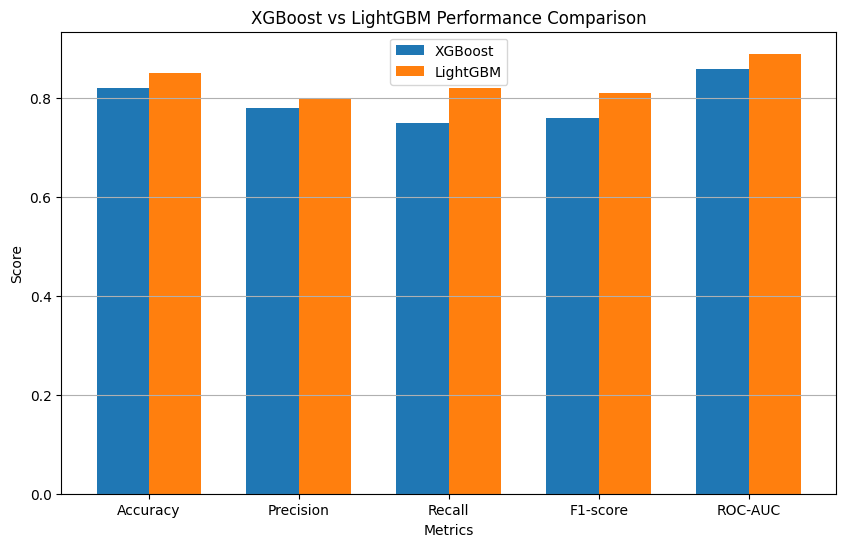

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Example metric dictionaries
# (Replace with your real results)
xgb_metrics = {
    "Accuracy": 0.82,
    "Precision": 0.78,
    "Recall": 0.75,
    "F1-score": 0.76,
    "ROC-AUC": 0.86
}

lgbm_metrics = {
    "Accuracy": 0.85,
    "Precision": 0.80,
    "Recall": 0.82,
    "F1-score": 0.81,
    "ROC-AUC": 0.89
}

metrics = list(xgb_metrics.keys())
xgb_values = list(xgb_metrics.values())
lgbm_values = list(lgbm_metrics.values())

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, xgb_values, width, label='XGBoost')
plt.bar(x + width/2, lgbm_values, width, label='LightGBM')

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("XGBoost vs LightGBM Performance Comparison")
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
XGBoost Strengths

 Very stable
 Good generalization
 Strong regularization → avoids overfitting
 Performs very well on small-to-medium datasets

XGBoost Weaknesses

 Slower than LightGBM
 Might underperform if data is very large
 Slightly lower recall compared to LightGBM on medical datasets

In [ ]:
LightGBM Strengths

 Very fast
 Excellent performance on large datasets
 High recall → finds more positive cases
 Handles categorical features efficiently
 Often achieves higher ROC-AUC

 LightGBM Weaknesses

 Can overfit if num_leaves is large
 Slightly less stable on small datasets
 Leaf-wise growth can create deep trees